## Analysis of Cancer patients clinical trial from ClinicalTrials.Gov

I have downloaded clinical trials data from the government registry ClinicalTrials.gov. I limited my search to all oncology-related trials in the database. 

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline


In [29]:
# Read data
trials = pd.read_csv('SearchResults.csv')

In [30]:
trials.head()

,Rank,Title,Status,Study Results,Conditions,Interventions,Locations,URL
0,1,Phase I/II Study of Hydroxychloroquine With It...,Recruiting,No Results Available,Prostate Cancer,Drug: SUBA-itraconazole|Drug: Hydroxychloroquine,"St Vincent's Hospital, Darlinghurst, New South...",https://ClinicalTrials.gov/show/NCT03513211
1,2,Telephone Follow-up After Treatment for Endome...,Completed,No Results Available,Endometrial Cancer,Other: Telephone Follow-up,"Royal Brisbane and Women's Hospital, Herston, ...",https://ClinicalTrials.gov/show/NCT01610375
2,3,Use of Hair to Diagnose Breast Cancer,Unknown status,No Results Available,Breast Cancer,Procedure: Cutting scalp hair,"St George Private Hospital, Sydney, New South ...",https://ClinicalTrials.gov/show/NCT00390377
3,4,Preoperative Radiotherapy and Chemotherapy in ...,Completed,No Results Available,Rectal Cancer,Radiation: External Beam Radiotherapy|Drug: Ox...,"Peter MacCallum Cancer Centre, Melbourne, Vict...",https://ClinicalTrials.gov/show/NCT01013805
4,5,Early Investigation of High Precision Radiothe...,Completed,No Results Available,Prostate Cancer,Radiation: Dose escalation using stereotactic ...,"Northern Sydney Cancer Centre, Royal North Sho...",https://ClinicalTrials.gov/show/NCT02004223


In [31]:
trials.shape

(2415, 8)

In [32]:
trials.dtypes

Rank              int64
Title            object
Status           object
Study Results    object
Conditions       object
Interventions    object
Locations        object
URL              object
dtype: object

In [33]:
trials.isnull().sum()

Rank              0
Title             0
Status            0
Study Results     0
Conditions        0
Interventions    43
Locations         0
URL               0
dtype: int64

In [34]:
trials.columns

Index(['Rank', 'Title', 'Status', 'Study Results', 'Conditions',
       'Interventions', 'Locations', 'URL'],
      dtype='object')

  **Data Visualisation**      

Text(0.5, 1.0, 'Recruitment Status')

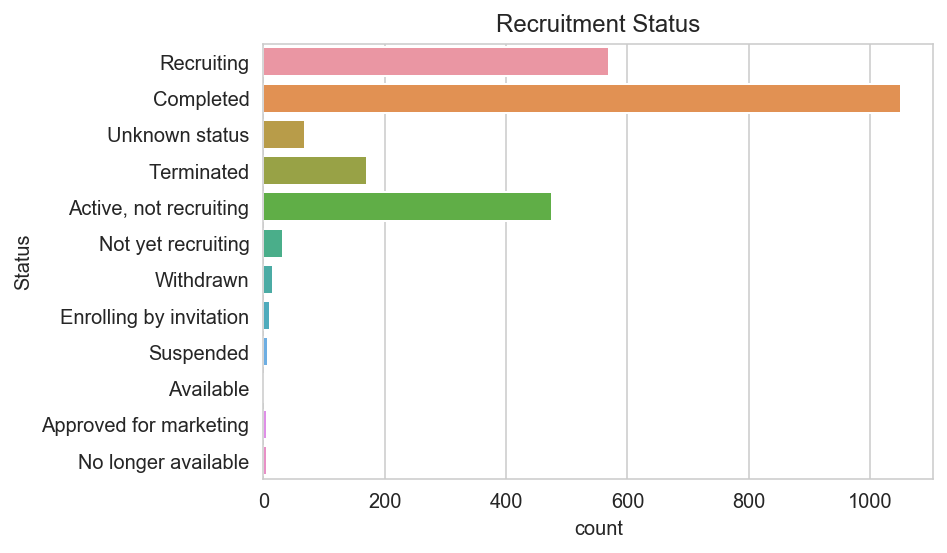

In [35]:
ax = sns.countplot(y="Status", data=trials, orient='h')
ax.set_title('Recruitment Status')

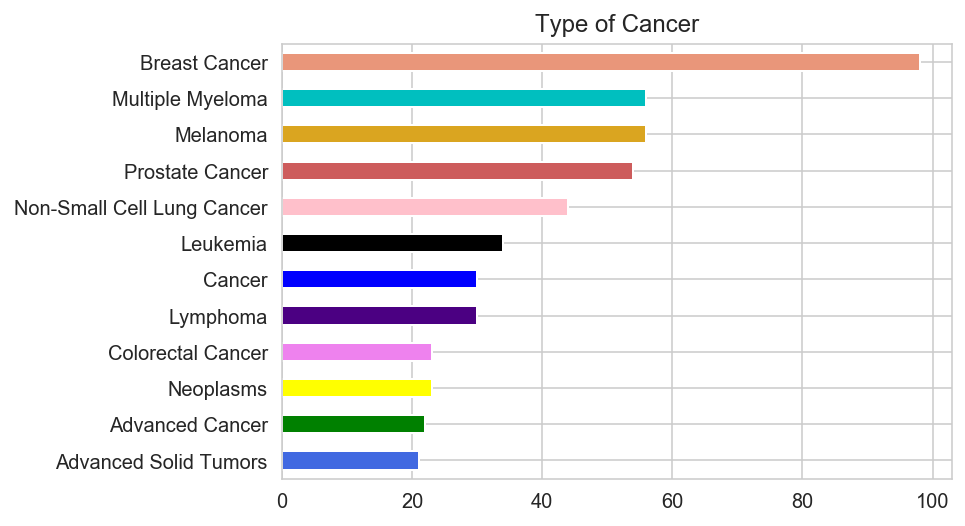

In [36]:
# get top 12 categories of cancer
Cancer_type = trials['Conditions'].value_counts().sort_values(ascending=True)[-12:]

# plot it with pandas
colors = ['royalblue', 'green', 'yellow', 'violet', 'indigo','blue', 'black', 'pink', 'indianred', 'goldenrod', 'c', 'darksalmon']
Cancer_type.plot(kind='barh', color=colors, title='Type of Cancer')

In [37]:
trials['Conditions'].value_counts()

Breast Cancer                                                                                                                98
Multiple Myeloma                                                                                                             56
Melanoma                                                                                                                     56
Prostate Cancer                                                                                                              54
Non-Small Cell Lung Cancer                                                                                                   44
                                                                                                                             ..
Head and Neck Cancer|Radiation Therapy Complication|Anxiety                                                                   1
Breast Cancer|Non-small Cell Lung Cancer|Melanoma|Brain Metastases                                      

Text(0.5, 1.0, 'Study Results')

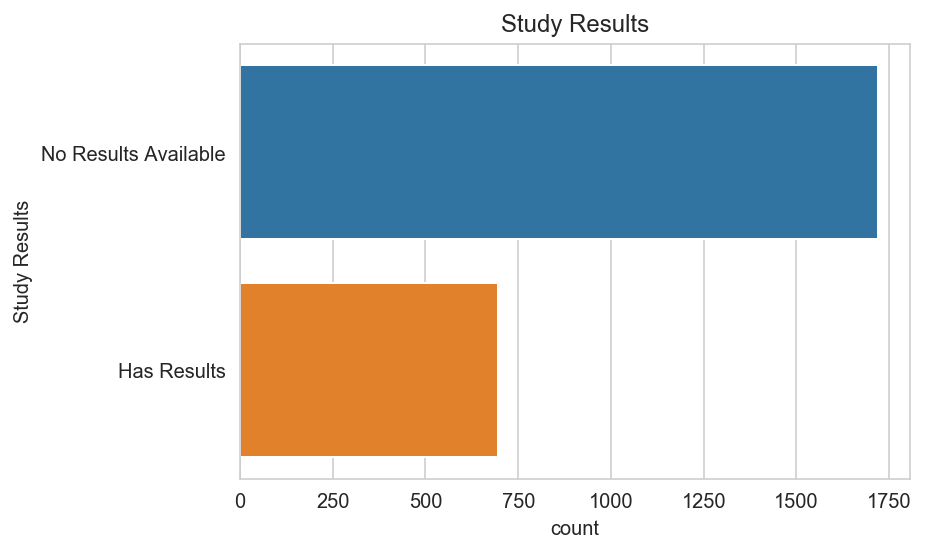

In [38]:
ax = sns.countplot(y="Study Results", data=trials, orient='h')
ax.set_title('Study Results')

## What cancers are most commonly studied?

In [39]:
# Search the "Conditions" column for cells that contain breast cancer
trials.Conditions.str.contains('breast', case=False).value_counts()[True]

242

In [40]:
# Search the "Conditions" column for cells that contain "cerv" for "cervical"
trials.Conditions.str.contains('myelo', case=False).value_counts()[True]

244

In [41]:
# Slice dataframe to get value counts for kidney cancer/renal cell carcinoma
((trials['Conditions'].str.contains('renal', case=False)) | 
          (trials['Conditions'].str.contains('kidney', case=False))).value_counts()[True]

87

In [42]:
# List of cancer sites
cancer_sites = [('breast', 'Breast'), ('lung', 'Lung'), ('colo', 'Colorectal'), ('prostate', 'Prostate'),
                ('pancrea', 'Pancreatic'), ('thyroid', 'Thyroid'), ('ovar', 'Ovarian'), ('melanoma', 'Melanoma'),
               ('esoph', 'Esophageal'), ('myeloma', 'Multiple Myeloma'), ('lymphoma', 'Lymphomas'),
                ('leukemia', 'Leukemias'), ('uter', 'Uterine'), ('bladder', 'Bladder'), ('cerv', 'Cervical'),
               ('head and neck', 'Head and Neck'), ('liver', 'Liver'), ('testi', 'Testicular')]

In [43]:
# Add columns for cancer sites
for search_term, site in cancer_sites:
    trials[site] = trials.Conditions.str.contains(search_term, case=False)
    trials[site] = trials[site].map({True:1, False:0})

In [44]:
# List of cancer sites with multiple names
cancer_sites_mult_names = [(('brain', 'glio'), 'Brain'), (('kidney', 'renal'), 'Kidney'), (('stomach', 'gastric'), 'Gastric'),
                           (('bone', 'osteos'), 'Bone'), (('soft tissue', 'gastrointestinal stromal'), 'Soft-tissue')]

In [45]:
# Add additional columns for cancer sites with multiple search terms
for search_terms, site in cancer_sites_mult_names:
    trials[site] = ((trials.Conditions.str.contains(search_terms[0], case=False)) | 
                     (trials.Conditions.str.contains(search_terms[1], case=False)))
    trials[site] = trials[site].map({True:1, False:0})

In [46]:
# for interactive visualizations
import plotly
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

In [47]:
import plotly.graph_objs as go

# x is name of the condition, y is the number of trials for that condition
x = trials.iloc[:, -23:].sum().sort_values(ascending=False).index.values
y = trials.iloc[:, -23:].sum().sort_values(ascending=False).values

data = [
    go.Bar(
    x = trials.iloc[:, -23:].sum().sort_values(ascending=True).values,
    y = trials.iloc[:, -23:].sum().sort_values(ascending=True).index.values,
    orientation='h')
]

layout = go.Layout(margin=dict(
    l=120, r=30, b=60, t=60))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='cancer_counts_hbar')

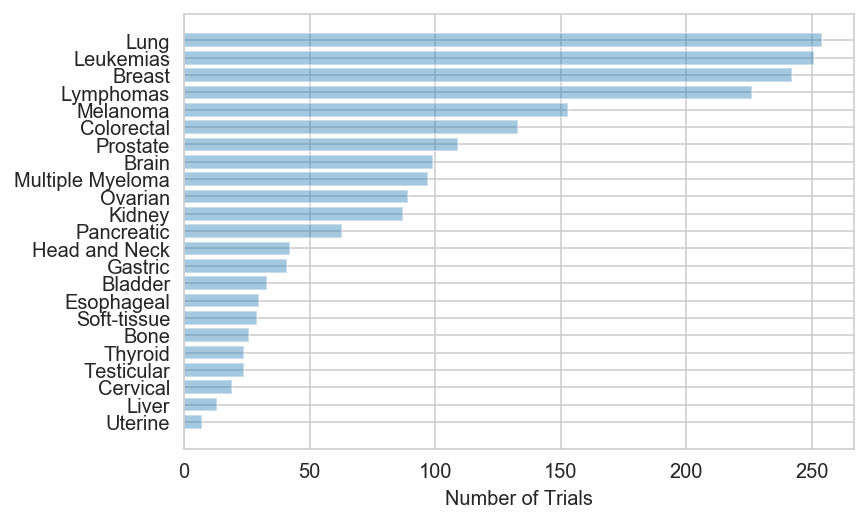

In [48]:
# Number of cancer sites - for number of bars on plot
num_cancer_sites = np.arange(len(cancer_sites) + len(cancer_sites_mult_names))

# Trial totals - for length of bars
trial_totals_by_site = trials.iloc[:, -23:].sum().sort_values(ascending=False).values

# Names of cancer sites - for bar labels
cancer_sites_high_to_low = trials.iloc[:, -23:].sum().sort_values(ascending=False).index

# Create horizontal bar
plt.barh(num_cancer_sites, trial_totals_by_site, align='center', alpha=0.4)

# Create yticks
plt.yticks(num_cancer_sites, cancer_sites_high_to_low)

# Create xlabel
plt.xlabel('Number of Trials')

# Invert graph
plt.gca().invert_yaxis()